In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,multilabel_confusion_matrix

In [2]:
df_train=pd.read_csv('mnist_train.csv')
df_test=pd.read_csv('mnist_test.csv')
df_train=df_train.to_numpy()
df_test=df_test.to_numpy()
X=df_train[:,1:]
y=df_train[:,0]
X=X/255
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)
X_test=df_test[:,1:]
y_test=df_test[:,0]

# The structure of Ensemble learning algorithm is chosen based on previous investigations on MLP ,KNN and DT structures

In [3]:
clfs =[('MLP',MLPClassifier(hidden_layer_sizes=(14, 30, 12))),
      ('MLP2',MLPClassifier(hidden_layer_sizes=(14, 28, 14))),
      ('MLP3',MLPClassifier(hidden_layer_sizes=(14, 30, 14))),
      ('MLP4',MLPClassifier(hidden_layer_sizes=(12, 30, 10))),
      ('KNN',KNeighborsClassifier(n_neighbors=3)),
      ('DT',DecisionTreeClassifier(max_depth=14))]

In [5]:
en_clf = VotingClassifier(clfs)
en_clf.fit(X_train, y_train)

C:\Users\Aminbemani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Aminbemani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Aminbemani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Aminbemani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

VotingClassifier(estimators=[('MLP',
                              MLPClassifier(activation='relu', alpha=0.0001,
                                            batch_size='auto', beta_1=0.9,
                                            beta_2=0.999, early_stopping=False,
                                            epsilon=1e-08,
                                            hidden_layer_sizes=(14, 30, 12),
                                            learning_rate='constant',
                                            learning_rate_init=0.001,
                                            max_fun=15000, max_iter=200,
                                            momentum=0.9, n_iter_no_change=10,
                                            nesterovs_momentum=True,
                                            power_t=0.5, random_state=Non...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                 

# Score for training , validation, and testing phases:

In [10]:
print('train score:', en_clf.score(X_train, y_train))
print('validation score:', en_clf.score(X_val, y_val))
print('test score:', en_clf.score(X_test, y_test))

train score: 0.9975
validation score: 0.971
test score: 0.9553


# Precision, accuracy, recall, and f1 values in testing phase:

In [11]:
h_test = en_clf.predict(X_test)
print('test precision:', precision_score(y_test, h_test,average='weighted'))
print('test accuracy:', accuracy_score(y_test, h_test))
print('test recall:', recall_score(y_test, h_test,average='weighted'))
print('test f1-score:', f1_score(y_test, h_test,average='weighted'))

test precision: 0.956215119066469
test accuracy: 0.9553
test recall: 0.9553
test f1-score: 0.9552292084744591


# Confusion matrix for multilable classification:

In [12]:
print(multilabel_confusion_matrix(y_test, h_test))

[[[8919  101]
  [   8  972]]

 [[8829   36]
  [  11 1124]]

 [[8918   50]
  [  36  996]]

 [[8915   75]
  [  38  972]]

 [[8985   33]
  [  43  939]]

 [[9095   13]
  [  88  804]]

 [[9012   30]
  [  35  923]]

 [[8923   49]
  [  37  991]]

 [[8988   38]
  [  65  909]]

 [[8969   22]
  [  86  923]]]


# Visualization of input data and predicted value:

Model predicts this sample as  [9]


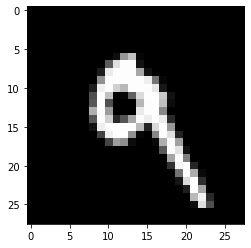

In [13]:
plt.imshow(X_test[7].reshape(28,28),cmap='gray')
h=en_clf.predict([X_test[7]])

print('Model predicts this sample as ',h )